# Интернет-магазин

Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
# Задача
Приоритизировать гипотезы, запустить A/B-тест и проанализовать результаты. 
# Цель
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
<br>
- Принять решение по результатам теста и объяснить его. Варианты решений:
    - Остановить тест, зафиксировать победу одной из групп.
    - Остановить тест, зафиксировать отсутствие различий между группами.
    - Продолжить тест.

In [1]:
# Загрузим необходимые библиотеки и параметры вывода
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams ['figure.figsize'] = [15, 5] # за ранее обозначим размер графиков
from pandas.plotting import register_matplotlib_converters
import warnings
pd.set_option('display.max_rows', None) # выводим все значения
pd.options.display.max_colwidth = 109 # максимальное число выводимых семволов в строке - 100

## Загрузка данных

In [2]:
try:
    hypothesis = pd.read_csv(r'C:\Users\user\Documents\AB-test\hypothesis.csv')
    orders = pd.read_csv(r'C:\Users\user\Documents\AB-test\orders.csv', parse_dates=['date'])
    visitors = pd.read_csv(r'C:\Users\user\Documents\AB-test\visitors.csv', parse_dates=['date'])
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
    visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])

### Описание данных

In [3]:
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


`Hypothesis` — краткое описание гипотезы;<br>
`Reach` — охват пользователей по 10-балльной шкале;<br>
`Impact` — влияние на пользователей по 10-балльной шкале;<br>
`Confidence` — уверенность в гипотезе по 10-балльной шкале;<br>
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

In [4]:
display(orders.sample(3))
orders.info()

,transactionId,visitorId,date,revenue,group
893,3390166538,329726006,2019-08-21,4188,A
1157,3716304192,2695379936,2019-08-14,590,A
986,218256919,91069833,2019-08-10,820,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


`transactionId` — идентификатор заказа;<br>
`visitorId` — идентификатор пользователя, совершившего заказ;<br>
`date` — дата, когда был совершён заказ;<br>
`revenue` — выручка заказа;<br>
`group` — группа A/B-теста, в которую попал заказ.<br>

In [5]:
display(visitors.sample(3))
visitors.info()

,date,group,visitors
57,2019-08-27,B,720
59,2019-08-29,B,531
15,2019-08-16,A,361


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


`date` — дата;<br>
`group` — группа A/B-теста;<br>
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.<br>

In [6]:
print(visitors.groupby('group')['date'].count())

group
A    31
B    31
Name: date, dtype: int64


Всего 2 группы: А и В. Количество дней - 31.

In [7]:
print('Дата начала теста:',visitors['date'].min())
print('Дата окончания теста:',visitors['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [8]:
print(orders.groupby('group')['visitorId'].count())# количество пользователей в каждой группе.

group
A    557
B    640
Name: visitorId, dtype: int64


In [9]:
print(orders.groupby('group')['visitorId'].nunique()) # количество уникальных пользователей в каждой группе.

group
A    503
B    586
Name: visitorId, dtype: int64


Количество уникальных пользователей меньше, чем общее число количество заказов. Возможно, что некоторые пользователи делали заказы несколько раз, точнее будем знать, когда проверим на дубликаты.

In [10]:
a_group = orders.loc[orders['group'] == 'A']
b_group = orders.loc[orders['group'] == 'B']
print(a_group.query('visitorId == visitorId in @b_group')) # вывод пользователя, который оказался и в группе А и в группе В.

Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []


Отлично! Пользоватлей, попавших в обе группы не найдено.

## Предобработка данных
  
### Стиль записи
Первым делом приведем название столбцов к "snake" стилю.

In [11]:
hypothesis.columns = map(str.lower, hypothesis.columns)
orders.columns = map(str.lower, orders.columns)
visitors.columns =  map(str.lower, visitors.columns)

In [12]:
print(hypothesis.columns)
print(orders.columns)
print(visitors.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')
Index(['date', 'group', 'visitors'], dtype='object')


Далее приведем `transactionid` и `visitorid` таблицы `orders` к общему стилю записи в 10 символов добавлению в начале недостающие "0"

In [13]:
display(orders[['transactionid','visitorid']].head(7))

,transactionid,visitorid
0,3667963787,3312258926
1,2804400009,3642806036
2,2961555356,4069496402
3,3797467345,1196621759
4,2282983706,2322279887
5,182168103,935554773
6,398296753,2900797465


In [14]:
orders['transactionid'] = orders['transactionid'].map(lambda x: f'{x:0>10}')
orders['visitorid'] = orders['visitorid'].map(lambda x: f'{x:0>10}')

In [15]:
display(orders[['transactionid','visitorid']][5:7]) # провирим правильность работы лямбда функции

,transactionid,visitorid
5,0182168103,0935554773
6,0398296753,2900797465


Готово. Можно приступать к следующему,

### Пропуски
**Проверим на пропуски:**

In [16]:
display(hypothesis.isnull().sum(),
        orders.isnull().sum(),
        visitors.isnull().sum()
       )

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

Пропусков нет.  
  
### Дубликаты
**Проверим на дубликаты.**

In [17]:
display(hypothesis.duplicated().sum(),
        orders.duplicated().sum(),
        visitors.duplicated().sum()
       )

0

0

0

явных дубликатов не обнаружено
  
**Проверим на неявные дубликаты.**

In [18]:
display(hypothesis['hypothesis'].unique())

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Не явных дубликатов не обнаружено. 
  
**В предобработке данных проделали следующее:**
- привели столбцы к snake-стилю;
- привели все id к общему стилю в 10 символов;
- рассмотрели наличие пропусков (оказалось их нет);
- рассмотрели дубликаты (так же нет).

## Приоритизация гипотез.
  
### Фреймворк ICE для приоритизации гипотез. 
  
Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [19]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],3)
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))
print()
print('Наиболее перспективные гипотезы по ICE с индексами 8, 0, 7:')
print('1 место: ',hypothesis['hypothesis'][8])
print('2 место: ',hypothesis['hypothesis'][0])
print('3 место: ',hypothesis['hypothesis'][7])

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000



Наиболее перспективные гипотезы по ICE с индексами 8, 0, 7:
1 место:  Запустить акцию, дающую скидку на товар в день рождения
2 место:  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3 место:  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


### Фреймворк RICE для приоритизации гипотез.
Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [20]:
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))
print()
print('Наиболее перспективные гипотезы по RICE с индексами 7, 2, 0:')
print('1 место: ',hypothesis['hypothesis'][7])
print('2 место: ',hypothesis['hypothesis'][2])
print('3 место: ',hypothesis['hypothesis'][0])

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0



Наиболее перспективные гипотезы по RICE с индексами 7, 2, 0:
1 место:  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2 место:  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3 место:  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


Приоритизация изменилась, так как параметр Reach, отвечающий за охват аудитории, влияет прямопропорционально в методе RICE, и он оказался выше у лидирующих гипотез.

**При применении данных способов приоритизации задач выявлены две перспективные гипотезы:**
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

## Анализ A/B-теста.
 
Для начала подготовим данные.

In [21]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']


orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

In [22]:
display(data.head(5))

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


- date — дата;
- orders_per_date_a — количество заказов в выбранную дату в группе A;
- revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
- orders_per_date_b — количество заказов в выбранную дату в группе B;
- revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
- orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
- revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
- orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
- revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
- visitors_per_date_a — количество пользователей в выбранную дату в группе A;
- visitors_per_date_b — количество пользователей в выбранную дату в группе B;
- visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
- visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

Проанализируем A/B-тест:  
  
### График кумулятивной выручки по группам. 

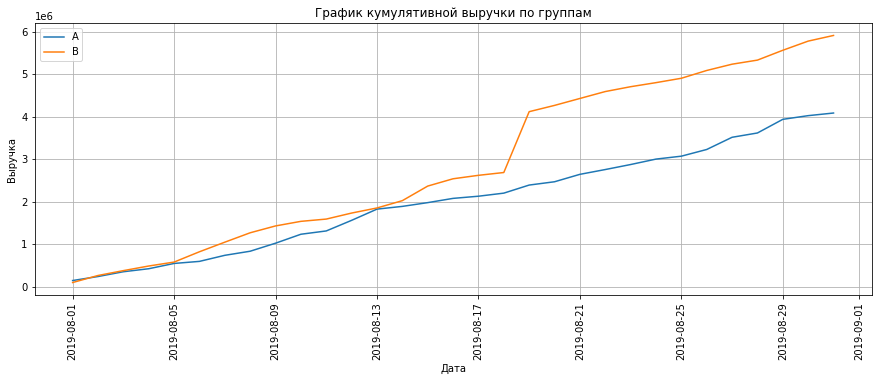

In [23]:
# Строим график выручки группы A
plt.plot(data['date'], data['revenue_cummulative_a'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenue_cummulative_b'], label='B')
plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(b=True)
plt.legend();

На протяжении 13 дней рост графика равномерный. 13 августа сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Так же наблюдается скачек в середине теста. Похоже, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить.

### График кумулятивного среднего чека по группам.

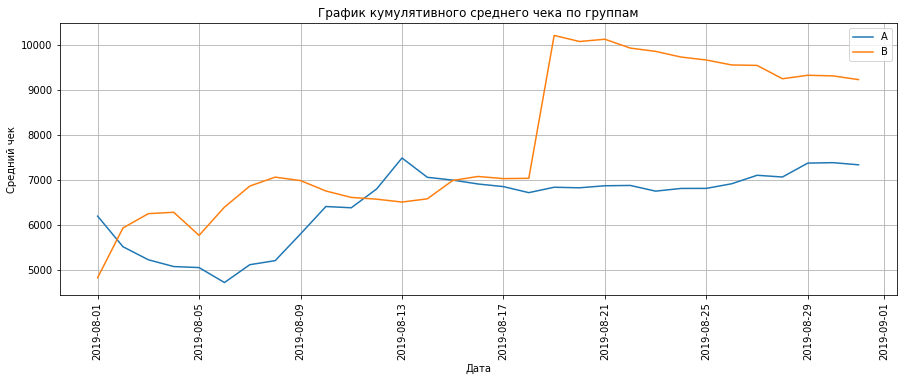

In [24]:
plt.plot(data['date'], data['revenue_cummulative_a']/data['orders_cummulative_a'], label='A')
plt.plot(data['date'], data['revenue_cummulative_b']/data['orders_cummulative_b'], label='B')
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Cредний чек')
plt.grid(b=True)
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста для группы A,а для группы B продолжает падать. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике в райне 17 августа). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.
Принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

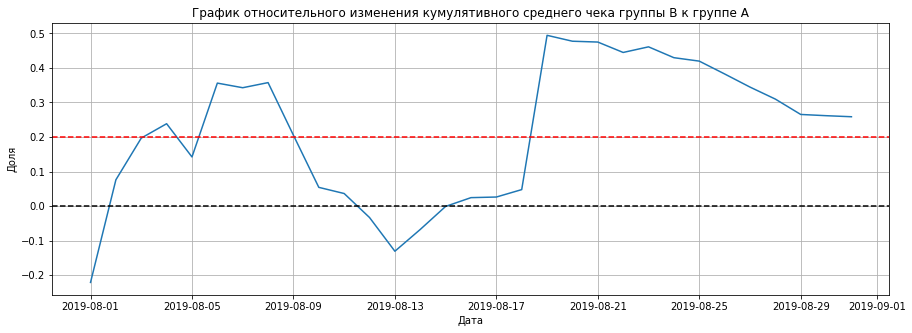

In [25]:
plt.plot(data['date'], (data['revenue_cummulative_b']/data['orders_cummulative_b'])/
                       (data['revenue_cummulative_a']/data['orders_cummulative_a'])-1
        )

plt.grid(b=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.20, color='red', linestyle='--');

Результаты теста значительно и резко менялись в несколько дат 1, 12,16 и 18 августа. Видимо, именно тогда были совершены аномальные заказы.

In [26]:
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### График кумулятивного среднего количества заказов на посетителя по группам.

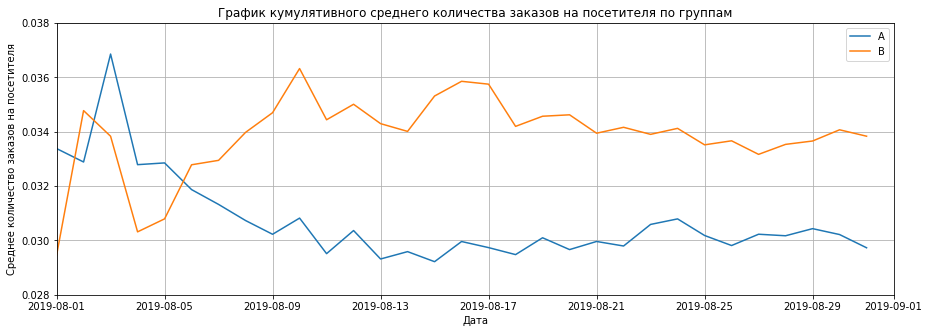

In [27]:
# строим графики
plt.plot(data['date'], data['orders_cummulative_a']/data['visitors_cummulative_a'], label='A')
plt.plot(data['date'], data['orders_cummulative_b']/data['visitors_cummulative_b'], label='B')


# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Cреднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

В начале теста группа A лидировала, но постепенно группа B выровнялась и зафиксировалась примерно около одного значения, больше значения группы A.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

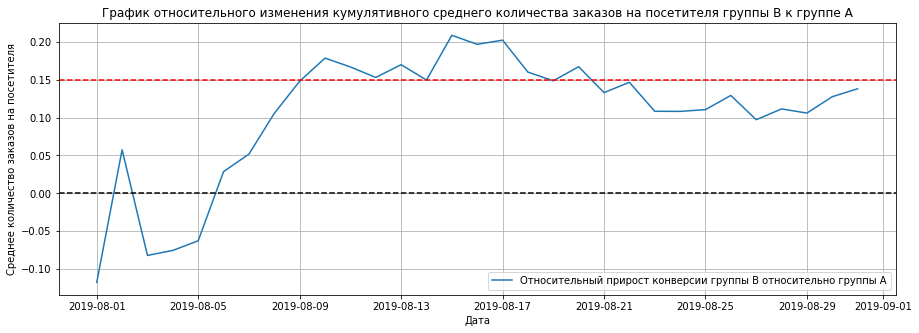

In [28]:
plt.plot(data['date'], (data['orders_cummulative_b']/data['visitors_cummulative_b'])/
                       (data['orders_cummulative_a']/data['visitors_cummulative_a'])-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.grid(b=True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Cреднее количество заказов на посетителя')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--');

c 6 дня теста группа B лидирует: становится лучше и колеблится около прироста в 15% относительно группы A.

### Точечный график количества заказов по пользователям.


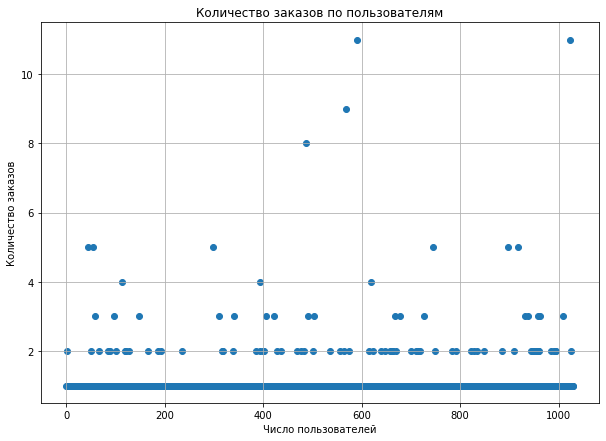

In [29]:
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders_by_users['transactionid'])
plt.xlabel('Число пользователей')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.grid()
plt.show()

Большая часть пользователей заказывали не больше 2 раз. Выше этого значения показатели вполне могут быть аномальными выбросами.

### 95-й и 99-й перцентили количества заказов на пользователя.


In [30]:
print(np.percentile(orders_by_users['transactionid'], [95, 99]))

[2. 4.]


Всего 5% пользователей оформляли больше 2х заказов, 1% пользователей заказывали больше 4х раз. Можно определить границу для определения аномальных пользователей в 2 или в 4 заказа.

### Точечный график стоимостей заказов.

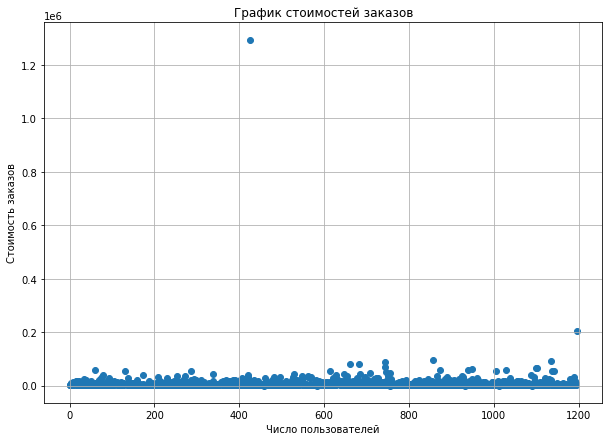

In [31]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.title("График стоимостей заказов")
plt.grid()
plt.show()

Основная масса пользователей делали заказы не более 100 тысяч. На графики видны единичные заказы в районе 200 тысяч и 1,3 миллиона. Возможно это аномальные выбросы.

### 95-й и 99-й перцентили стоимости заказов. 

In [32]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Всего 5% пользователей потратили более 28 тысяч, 1% пользователей потратили более 58,2 тысяч. Можно определить границу для определения аномальных пользователей в 28 тысяч или в 58,2 тысяч.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
  
Для начала подготовим данные:

In [33]:
# Создадим переменные orders_by_users для групп А и В. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorid', 'transactionid']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorid', 'transactionid']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat([orders_by_users_a['transactionid'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - 
                                                  len(orders_by_users_a['transactionid'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_b['transactionid'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - 
                                                  len(orders_by_users_b['transactionid'])), name='orders')],axis=0)

Гипотезы: <br>
H0:Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;<br>
H1:Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

In [34]:
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


P-value значительно меньше 0.05. Можно отвергнуть нулевую гипотезу. <br>
Значит, нулевую гипотезу о том, что в статистически значимых различий в среднем числе заказов между группами нет, отвергаем.<br>
Относительный прирост среднего группы В к конверсии группы А равен примерно 14%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 
  
Гипотезы:

H0:Средние чеки групп A и B равны, статистически значимых отличий нет;

H1:Средние чеки групп A и B различны, статистически значимые отличия есть.

In [35]:
print('P-value:','{0:.3f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                 orders[orders['group']=='B']['revenue'])[1])
         )
print('Относительные различия:','{0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/
              orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.259


P-value значительно больше 0.05. <br>
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.<br>
Впрочем, средний чек группы B выше среднего чека группы A на 25,9%

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
  
Подготовим данные.<br>
На основнии 95-й и 99-й перцентилей подсчитанных выше (по заказам 2 и 4, по стоимости 28000 и 58233.2). <br>
Примем за аномальные значения 3 заказа со стоимостью 29000. Так мы уберем 5% аномальных пользователей.

In [36]:
anomal_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['transactionid'] > 4]['visitorid'],
        orders_by_users_b[orders_by_users_b['transactionid'] > 4]['visitorid'],
    ],
    axis=0,
                         )
anomal_revenue = orders[orders['revenue'] > 30000]['visitorid']

abnormal_users = (
    pd.concat([anomal_orders, anomal_revenue], axis=0)
      .drop_duplicates()
      .sort_values()
                 )
print(abnormal_users.head(5))
print('Всего',abnormal_users.shape[0],'аномальных пользователей.')

1099    0148427295
928     0204675465
684     0358944393
648     0382846391
1189    0393266494
Name: visitorid, dtype: object
Всего 53 аномальных пользователей.


Создадим переменные, очищенные от аномалий.

In [37]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorid'].isin(abnormal_users))
                         ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['transactionid'])
                           ),
            name='orders',
                 ),
    ],
    axis=0,
                               )

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorid'].isin(abnormal_users))
                      ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['transactionid'])
                 ),
            name='orders',
                 ),
    ],
    axis=0,
                              ) 

In [38]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительные различия:','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value: 0.019
Относительные различия: 0.144


Результаты по среднему количеству заказов практически не изменились, по сравнению с сырыми данными.

Относительный прирост среднего группы В к конверсии группы А равен чуть больше 14%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


In [39]:
print('P-value:','{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                              )
                   ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                              )
                  ]['revenue'],
                           )[1]
                                  )
     )

print('Относительные различия:', '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
                          )
                ]['revenue'].mean()
        - 1
                                                 )
     ) 

P-value: 0.979
Относительные различия: -0.017


По сравнению с сырыми данными P-value стало больше (было 0.729, стало 0.979), а относительные различия уменьшелись с 25,9% до 1,7%. Это уменьшение обуславливается устранением аномальных значений. 

## Вывод

**Имеющиеся факты:**

- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по «очищенным» данным и по "сырым данным".

- Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;

- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A на примерно 15%.

- График различия среднего чека говорит о том, что результаты группы B лучше группы А примерно на 20%.

На основании фактов можно сделать **вывод**: <br>
Остановить тест. Признать его успешным.<br>
Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле равный или хуже сегментв A — практически нулевая.